<a href="https://colab.research.google.com/github/ShreedarshM/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv", encoding='unicode_escape')

In [5]:
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
dataset.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [10]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
numerical_features = dataset.describe().columns
dist_column = list(numerical_features)
dist_column

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [12]:
dataset.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

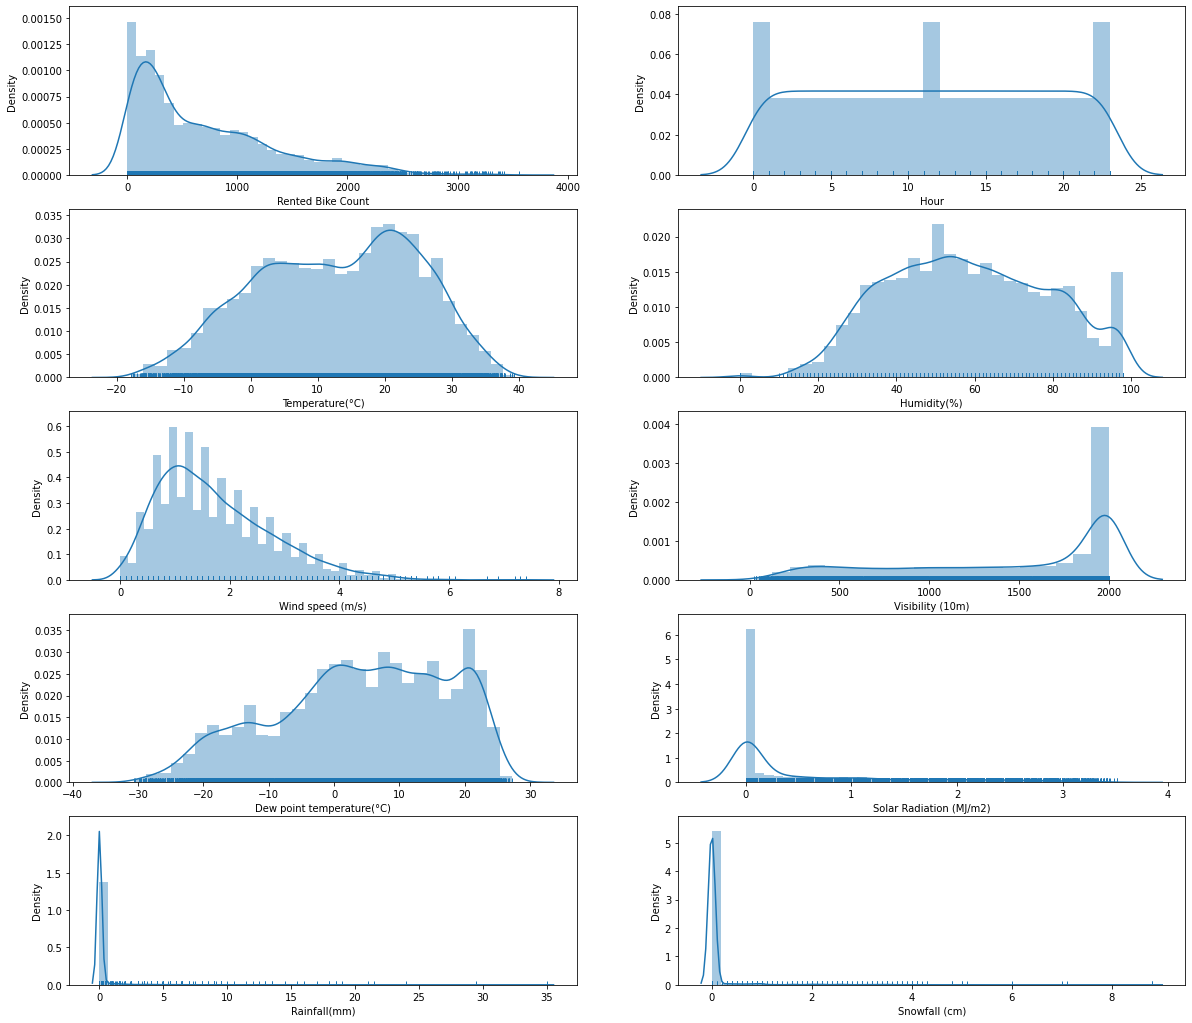

In [13]:
plt.figure(figsize=(20,18))
for i in range(len(dist_column)):
  plt.subplot(5,2,i+1)
  sns.distplot(dataset[dist_column[i]],hist=True,rug=True)

In [14]:
# Extraction of month and year
frame = pd.to_datetime(dataset['Date'],dayfirst=True)
dataset['month'] = frame.dt.month
dataset['year'] = frame.dt.year

Text(0.5, 1.0, 'Number of bikes rented at different months')

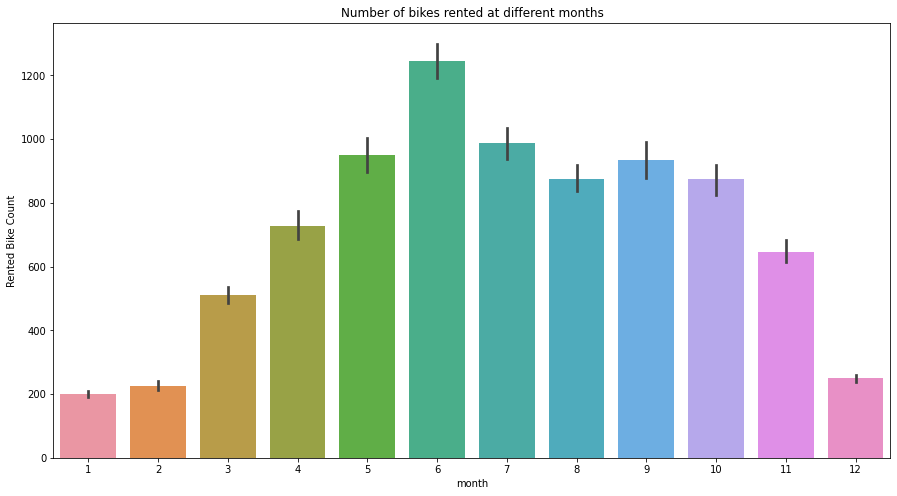

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count', data = dataset)
plt.title('Number of bikes rented at different months')


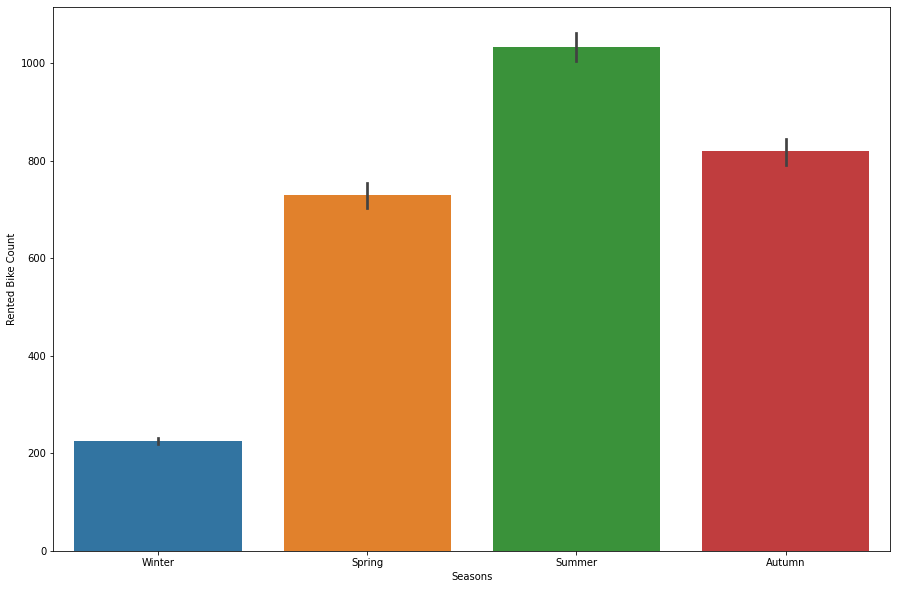

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x='Seasons',y='Rented Bike Count', data=dataset)


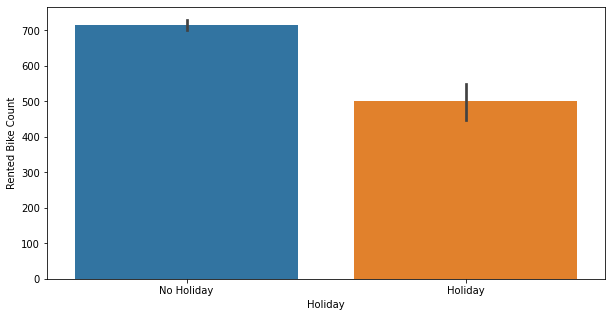

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday',y='Rented Bike Count', data=dataset)

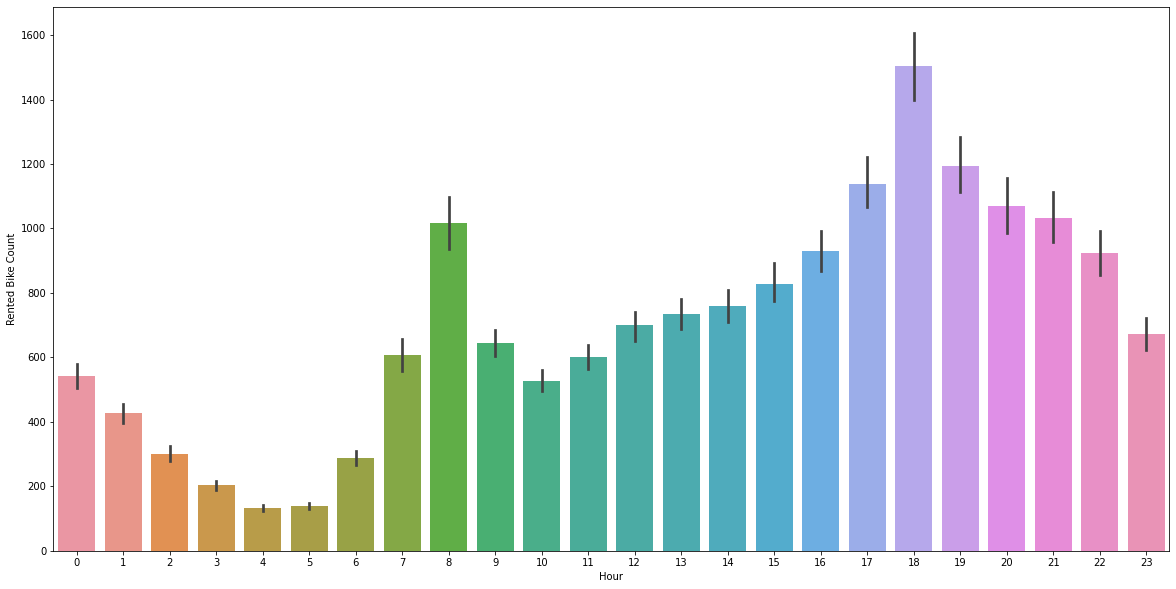

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(x='Hour',y='Rented Bike Count', data=dataset)

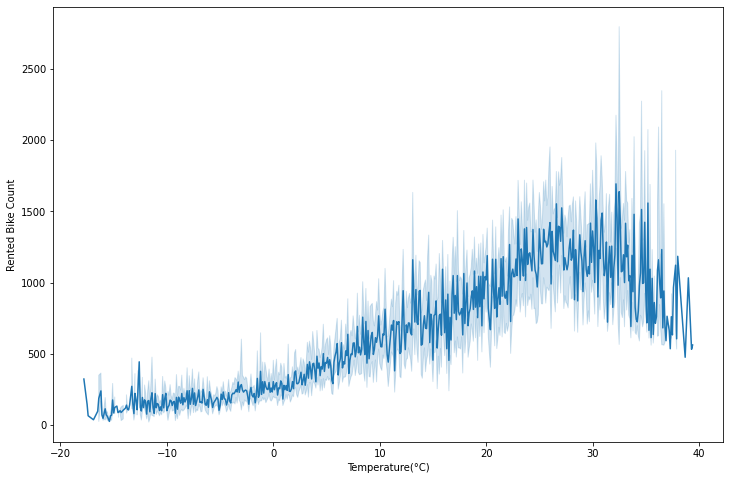

In [19]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count', data=dataset)

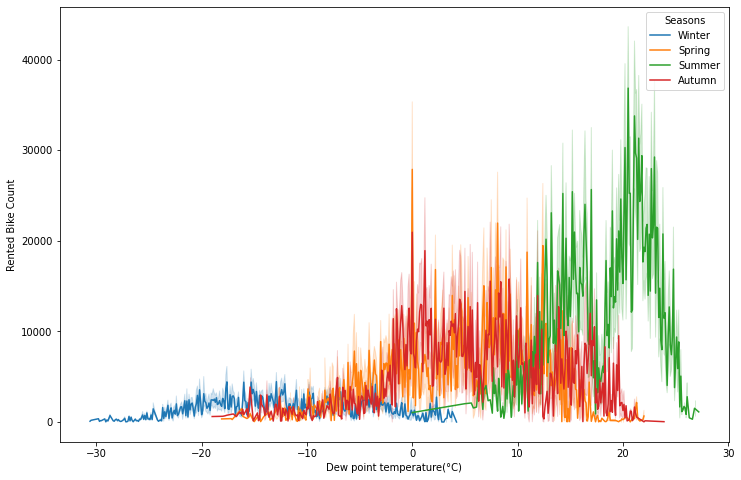

In [20]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Dew point temperature(°C)',y='Rented Bike Count', data=dataset, estimator = 'sum',hue='Seasons',)

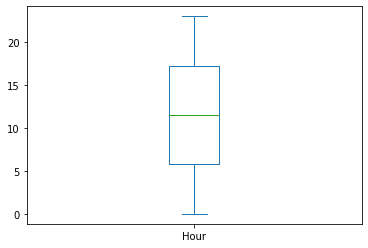

In [21]:
dataset['Hour'].plot.box()

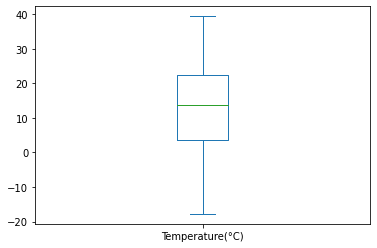

In [22]:
dataset['Temperature(°C)'].plot.box()

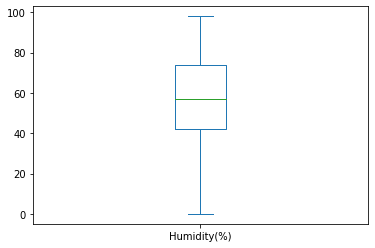

In [23]:
dataset['Humidity(%)'].plot.box()

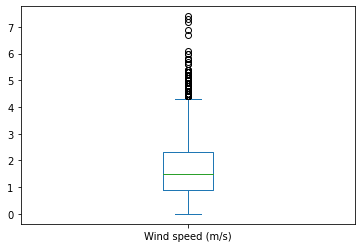

In [24]:
dataset['Wind speed (m/s)'].plot.box()

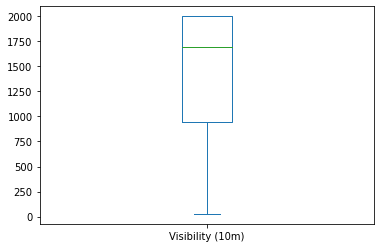

In [25]:
dataset['Visibility (10m)'].plot.box()

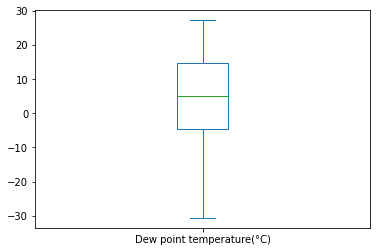

In [26]:
dataset['Dew point temperature(°C)'].plot.box()

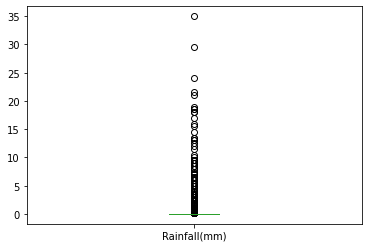

In [27]:
dataset['Rainfall(mm)'].plot.box()

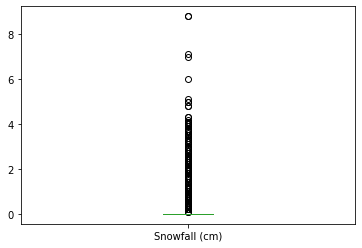

In [28]:
dataset['Snowfall (cm)'].plot.box()

In [29]:
#Outlier treatment
dataset['Rainfall(mm)']=np.log10(dataset['Rainfall(mm)']+1)
dataset['Snowfall (cm)']=np.log10(dataset['Snowfall (cm)']+1)

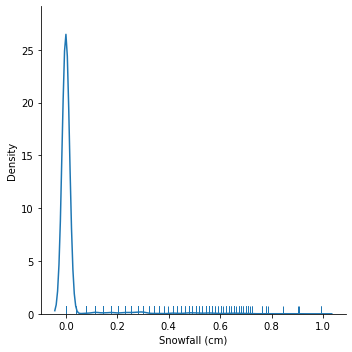

In [30]:
sns.displot(dataset['Snowfall (cm)'], kind='kde', rug=True)

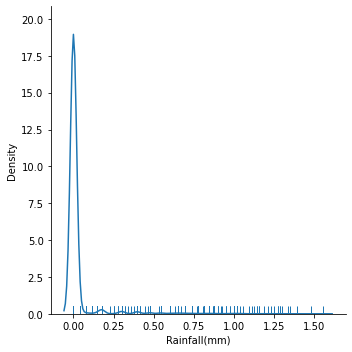

In [31]:
sns.displot(dataset['Rainfall(mm)'], kind='kde', rug=True)

In [32]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [33]:
dataset['Rainfall(mm)'].fillna(0,inplace = True)
dataset['Snowfall (cm)'].fillna(0,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [34]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [35]:
dataset.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [36]:
dataset.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [37]:
dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
newdf = dataset.drop(['Rented Bike Count', 'Date'], axis =1)

In [39]:
newdf['Holiday']=newdf['Holiday'].apply(lambda x : 0 if x=='No Holiday' else 1)
newdf['Functioning Day']= newdf['Functioning Day'].apply(lambda x : 0 if x=='No' else 1)

In [40]:
#Label encoding for seasons
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
newdf['Seasons'] = label.fit_transform(newdf['Seasons'])

In [41]:
newdf

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,12,2017
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,11,2018
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,11,2018
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,11,2018
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,11,2018


In [42]:
newdf['Date'] = dataset['Date']
newdf['Rented Bike Count'] = dataset['Rented Bike Count']


In [43]:
newdf.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,Date,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,78


In [48]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1=newdf.drop(['Rented Bike Count','Date'], axis=1)
df=scaler.fit_transform(df1)


In [56]:
df=pd.DataFrame(df,columns=list(df1.columns))
df['Date']=dataset['Date']
df['Rented Bike Count'] = dataset['Rented Bike Count']
df.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,Date,Rented Bike Count
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,01/12/2017,254
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,01/12/2017,204
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,01/12/2017,173
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,01/12/2017,107
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,01/12/2017,78


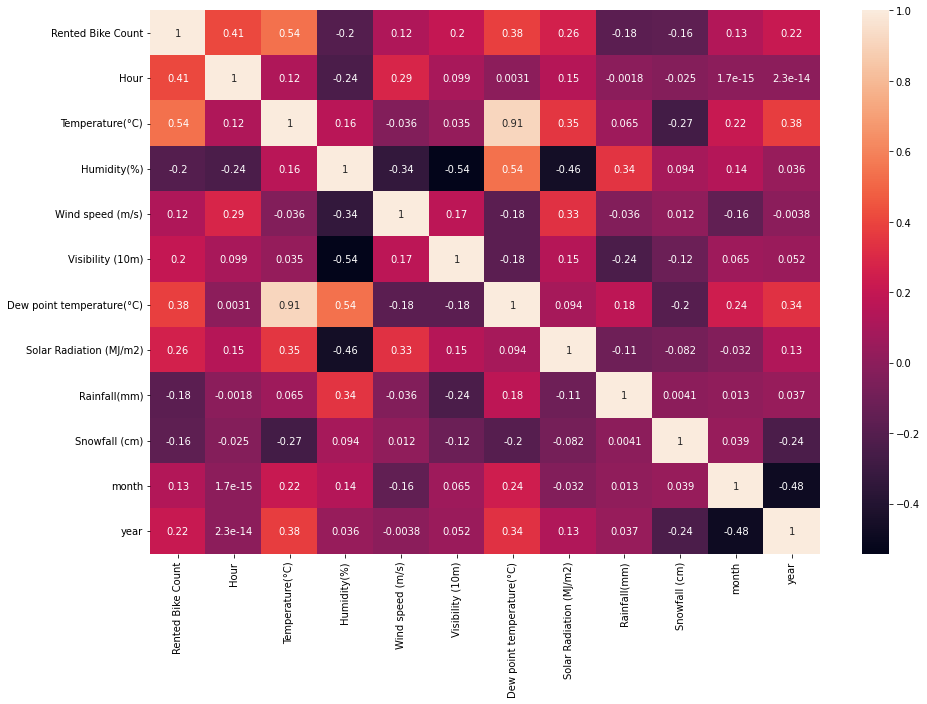

In [58]:
plt.figure(figsize=(15,10))
correlation= dataset.corr()
sns.heatmap(correlation, annot=True)

In [98]:
#Dropping 'Due point Temperature column as it has high rate of multicolleniarity
newdf.drop(['Dew point temperature(°C)'], axis=1)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,0,1,254
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,0,1,204
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,0,1,173
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,0,1,107
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,1,1003
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,1,764
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,1,694
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,1,712


##<b> Modelling

In [60]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [97]:
newdf = newdf.drop(['Date','month','year'], axis = 1)

In [ ]:
newdf

In [92]:
X=newdf.iloc[:,0:-1].values
y=newdf.iloc[:,15:].values

In [94]:
X

array([[0, -5.2, 37, ..., 12, 2017, '01/12/2017'],
       [1, -5.5, 38, ..., 12, 2017, '01/12/2017'],
       [2, -6.0, 39, ..., 12, 2017, '01/12/2017'],
       ...,
       [21, 2.6, 39, ..., 11, 2018, '30/11/2018'],
       [22, 2.1, 41, ..., 11, 2018, '30/11/2018'],
       [23, 1.9, 43, ..., 11, 2018, '30/11/2018']], dtype=object)

In [93]:
y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]])